# HLT Project - Sentiment Analysis

The purpose of our project is to take as input product reviews collected from Amazon and be able to distinguish between positive and negative reviews.

Our idea is to attempt binary classification using only the review titles as input, such as *”Great CD”* or *”Batteries died within a year”*. Clearly, titles are usually short and impactful phrases. Therefore, we believe that these may be sufficient to effectively operate our classifier. However, we plan to extend this idea by also attempting classification using the entire reviews as input. Using the entire reviews entails processing longer sentences and greater computational effort, but it also provides more information and potentially higher accuracy. At this point, our plan is to compare the results of these two classifiers using various metrics to determine which approach is more effective.

**Update**: We are including an additional potential task to implement. We have identified a second dataset that again would allow us to input product reviews from Amazon and classify them as positive or negative reviews. In this case, we could evaluate our algorithms on the two different datasets to assess their effectiveness.


# Import Libraries

As a first step we import all the libraries that we will use in the course of our work.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Utility Functions

As a second step we define some utility functions that we will use during the course of the notebook. Most of these functions will be used to plot different types of graphs, useful especially in the analysis part. We also include some functions that we use in the text cleaning part.

### Bar Chart

In [2]:
# Create a bar chart
def barchart_func(data_to_plot, figsize=(12,6), ticksrange=None, ticksname=None, 
                  title=None, xlabel=None, ylabel=None, color="blue", rotation=0,
                  xscale=None, yscale=None, show_grid=False):
    
    plt.figure(figsize=figsize)
    data_to_plot.plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if ticksrange is not None and ticksname is not None:
        plt.xticks(ticksrange, ticksname, rotation=rotation)
        
    if xscale is not None:
        plt.xscale(xscale)
    
    if yscale is not None:
        plt.yscale(yscale)

    if show_grid:
        plt.grid(True)

    plt.show()

### Histogram Plot

In [3]:
# Create a histogram
def sea_histogram(dataframe_to_plot, column_of_interest, figsize=(8,10), title=None, xlabel=None, 
                  ylabel=None, hue=None, palette="deep", stat="count", binwidth=None,
                  multiple="layer", element="step", fill=True, shrink=1, kde=False, color="blue", 
                  log_scale=None, ylog=False, xlog=False, show_grid=False):

    plt.figure(figsize=figsize)
    
    if hue:
        sns.histplot(data=dataframe_to_plot, x=column_of_interest, hue=hue, stat=stat, 
                     binwidth=binwidth, multiple=multiple, element=element, fill=fill, 
                     shrink=shrink, kde=kde, palette=palette, log_scale=log_scale)
    else:
        sns.histplot(data=dataframe_to_plot, x=column_of_interest, stat=stat, 
                     binwidth=binwidth, element=element, fill=fill,
                     shrink=shrink, kde=kde, color=color, log_scale=log_scale)
        
    if ylog:
        plt.yscale("log")

    if xlog:
        plt.xscale("log")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    if show_grid:
        plt.grid(True)

    plt.show()

### Pie Plot

In [4]:
# Create a pie plot
def pieplot_func(value_counts_to_plot, labels, figsize=(8, 8), title=None, autopct_value='%1.1f%%', labeldistance=1.1):
    plt.figure(figsize=figsize)
    
    if autopct_value is not None:
        plt.pie(value_counts_to_plot, labels=labels, autopct=autopct_value, startangle=90, labeldistance=labeldistance)
    else:
        plt.pie(value_counts_to_plot, labels=labels, startangle=90, labeldistance=labeldistance)
    
    plt.title(title)
    plt.show()

### Box Plot

In [5]:
# Create a boxplot
def boxplot_func(columns_of_interest, data_frame, whis=1.5, yscale=None, title=None):

    data_frame.boxplot(column=columns_of_interest, whis=whis)
    
    if yscale is not None:
        plt.yscale(yscale)

    plt.title(title) 
    plt.show()  

### WordCloud

In [6]:
# Create WordCloud with text of reviews
def wordcloud_fun(dataset, data_to_plot, figsize=(20,20), max_words=2000,
                  min_font_size=10, height=800, width=1600, background_color="white"):
    
    plt.figure(figsize=figsize)
    wc = WordCloud(max_words=max_words, min_font_size=min_font_size, height=height, width=width, 
                   background_color=background_color).generate(" ".join(dataset[data_to_plot]))
    plt.imshow(wc)
    plt.axis('off')  # Remove the axis
    plt.show()

### Clean Text

In [7]:
# Create a function that delete special characters from text and bring it all to lower case
def clean_text(df, field):
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.replace("_", " ")
    df[field] = df[field].str.replace("-", " ")
    df[field] = df[field].str.replace(r'http\S*', '', regex=True)
    df[field] = df[field].str.replace(r"[^a-zA-Z0-9(),\"'\n\s.!?;:\[\]/%]", "", regex=True)
    df[field] = df[field].str.lower()
    return df

# Load the Datasets

### First Dataset - Amazon Reviews

The **Amazon Reviews** dataset consists of reviews from Amazon. We then load this first dataset, which we save in the **Dataset_1** dataframe.

In [8]:
Dataset_1 = pd.read_csv("Datasets/Dataset_1/train.csv", header=None, names=["polarity", "title", "text"])

The dataset contains 3 different columns: *polarity*, *title*, *text*. Here’s a brief description of these features:

- *polarity*: In this column, a number between 1 and 2 is written. In constructing the dataset, the label 1 was inserted for all negative reviews (those with 1 or 2 stars), while the label 2 was inserted for all positive reviews (4 or 5 stars). Reviews with 3 stars were ignored. 
- *title*: It contains the titles of the reviews.
- *text*: It contains the entire text of each review.

In [9]:
Dataset_1.head()

polarity                                              title  \
0         2                     Stuning even for the non-gamer   
1         2              The best soundtrack ever to anything.   
2         2                                           Amazing!   
3         2                               Excellent Soundtrack   
4         2  Remember, Pull Your Jaw Off The Floor After He...   

                                                text  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...

Let us print some information about this dataframe.

In [10]:
Dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   title     object
 2   text      object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


### Second Dataset - Amazon Books Reviews

Also the **Amazon Books Reviews** dataset consists of reviews from Amazon. We load our dataset into the **Dataset_2** dataframe.

In [11]:
Dataset_2 = pd.read_csv("Datasets/Dataset_2/Books_rating.csv")

We print the first 5 rows of the dataframe to see the information it carries. As we can see many columns will not be interesting for our studies, so we will remove them later. In particular, we will focus only on three columns: review/score, review/summary, review/text. Here’s a brief description of these features:
- *review/score:* It contains the score, from 1 to 5 stars, of each review. Specifically, 1 star indicates that the review is strongly negative, while 5 stars indicate that the review is strongly positive. 
- *review/summary:* It contains the titles of the reviews.
- *review/text:* It contains the entire text of each review.

In [12]:
Dataset_2.head()

Id                           Title  Price         User_id  \
0  1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   

                          profileName review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"                7/7           4.0   
1                       Kevin Killian              10/10           5.0   
2                        John Granger              10/11           5.0   
3  Roy E. Perry "amateur philosopher"                7/7           4.0   
4     D. H. Richards "ninthwavestore"                3/3           4.0   

   review/time                                   review/summary  \
0    940636800           Nice collection of Julie Strain images   
1   1095724800                                Really Enjoyed It   
2   1078790400  Essential for every personal and Public Library   
3   1090713600  Phlip Nel gives silly Seuss a serious treatment   
4   1107993600                           Good academic overview   

                                         review/text  
0  This is only for Julie Strain fans. It's a col...  
1  I don't care much for Dr. Seuss but after read...  
2  If people become the books they read and if "t...  
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...  
4  Philip Nel - Dr. Seuss: American IconThis is b...

Let again print some information about this dataframe.

In [13]:
Dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


# Cleaning Dataset

At this point move on to cleaning our datasets.

### First Dataset - Amazon Reviews

As a first step we see if there are duplicate rows. In the *Dataset_1* we do not find duplicates to delete.

In [14]:
Duplicated_raws=Dataset_1.duplicated()
print("The total number of duplicate rows are", Duplicated_raws.sum())
#Dataset_1=Dataset_1.drop_duplicates()

The total number of duplicate rows are 0


Let us now check whether there are some null elements in some columns. 

As we can see, there are 207 null elements in the *title* column. Since we have to use this column during our analysis, we cannot have null elements. We are therefore going to delete the rows with null elements.

In [15]:
Dataset_1.isna().sum()

polarity      0
title       207
text          0
dtype: int64

In [16]:
Dataset_1=Dataset_1.dropna()

We now go on to clean the text of special characters and also switch all uppercase to lowercase: in fact, our model will be able to work with lowercase. We will use the **clean_text** function defined in the Utility Function section.

In [17]:
clean_text(Dataset_1,"title")
clean_text(Dataset_1, "text")

Dataset_1.head()

polarity                                              title  \
0         2                     stuning even for the non gamer   
1         2              the best soundtrack ever to anything.   
2         2                                           amazing!   
3         2                               excellent soundtrack   
4         2  remember, pull your jaw off the floor after he...   

                                                text  
0  this sound track was beautiful! it paints the ...  
1  i'm reading a lot of reviews saying that this ...  
2  this soundtrack is my favorite music of all ti...  
3  i truly like this soundtrack and i enjoy video...  
4  if you've played the game, you know how divine...

### Second Dataset - Amazon Books Reviews

In the second dataset, as a first step, we remove all columns that we do not need for our analysis.

In [18]:
Dataset_2=Dataset_2.drop(columns="User_id")
Dataset_2=Dataset_2.drop(columns="profileName")
Dataset_2=Dataset_2.drop(columns="review/time")
Dataset_2=Dataset_2.drop(columns="Id")
Dataset_2=Dataset_2.drop(columns="Price")
Dataset_2=Dataset_2.drop(columns="review/helpfulness")
Dataset_2=Dataset_2.drop(columns="Title")

In [19]:
Dataset_2.head()

review/score                                   review/summary  \
0           4.0           Nice collection of Julie Strain images   
1           5.0                                Really Enjoyed It   
2           5.0  Essential for every personal and Public Library   
3           4.0  Phlip Nel gives silly Seuss a serious treatment   
4           4.0                           Good academic overview   

                                         review/text  
0  This is only for Julie Strain fans. It's a col...  
1  I don't care much for Dr. Seuss but after read...  
2  If people become the books they read and if "t...  
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...  
4  Philip Nel - Dr. Seuss: American IconThis is b...

Now we can do the same operations we did for the first dataset. So we move on to delete all duplicate rows, of which there are many in this second dataset, and to delete all rows with null values.

In [20]:
Duplicated_raws=Dataset_2.duplicated()
print("The total number of duplicate rows are", Duplicated_raws.sum())

Dataset_2=Dataset_2.drop_duplicates()

The total number of duplicate rows are 931690


In [21]:
Dataset_2.isna().sum()


review/score        0
review/summary    188
review/text         2
dtype: int64

In [22]:
Dataset_2=Dataset_2.dropna()

Again, we close this part by cleaning the text of the second dataset, using the same function used for the first dataset.

In [23]:
clean_text(Dataset_2,"review/summary")
clean_text(Dataset_2, "review/text")

Dataset_2.head()

review/score                                   review/summary  \
0           4.0           nice collection of julie strain images   
1           5.0                                really enjoyed it   
2           5.0  essential for every personal and public library   
3           4.0  phlip nel gives silly seuss a serious treatment   
4           4.0                           good academic overview   

                                         review/text  
0  this is only for julie strain fans. it's a col...  
1  i don't care much for dr. seuss but after read...  
2  if people become the books they read and if "t...  
3  theodore seuss geisel (1904 1991), aka quot;dr...  
4  philip nel   dr. seuss: american iconthis is b...

# Exploring datasets

### First Dataset - Amazon Reviews

In [24]:
Dataset_1.shape

(3599793, 3)

Let us look at the distribution of values in the *polarity* column. As we see these values are practically balanced.

In [25]:
Dataset_1.polarity.value_counts()

polarity
2    1799913
1    1799880
Name: count, dtype: int64

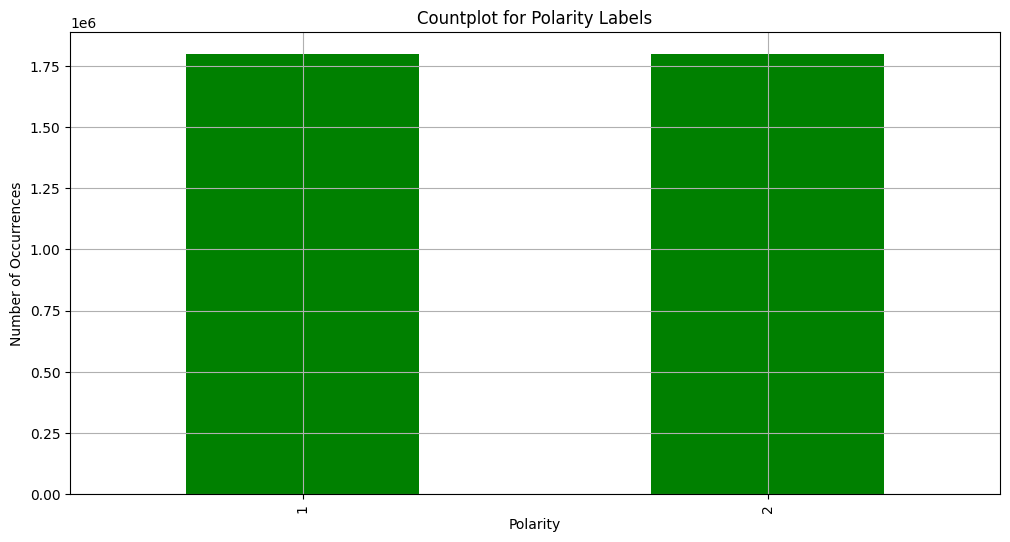

In [26]:
data_by_polarity = Dataset_1.groupby('polarity').size()

barchart_func(data_to_plot=data_by_polarity,
              ticksrange=range(len(data_by_polarity)),
              ticksname=data_by_polarity.index,
              title='Countplot for Polarity Labels',
              xlabel="Polarity",
              ylabel="Number of Occurrences",
              color="green",
              rotation=90,
              #yscale=None,
              show_grid=True)

#### WordClouds on Reviews

Now we use **WordClouds**, that is useful for viewing and analyzing words that are frequently used. We first do that analysis on data with polarity equal to 1, so with bad reviews, and then to data with polarity equal to 2.

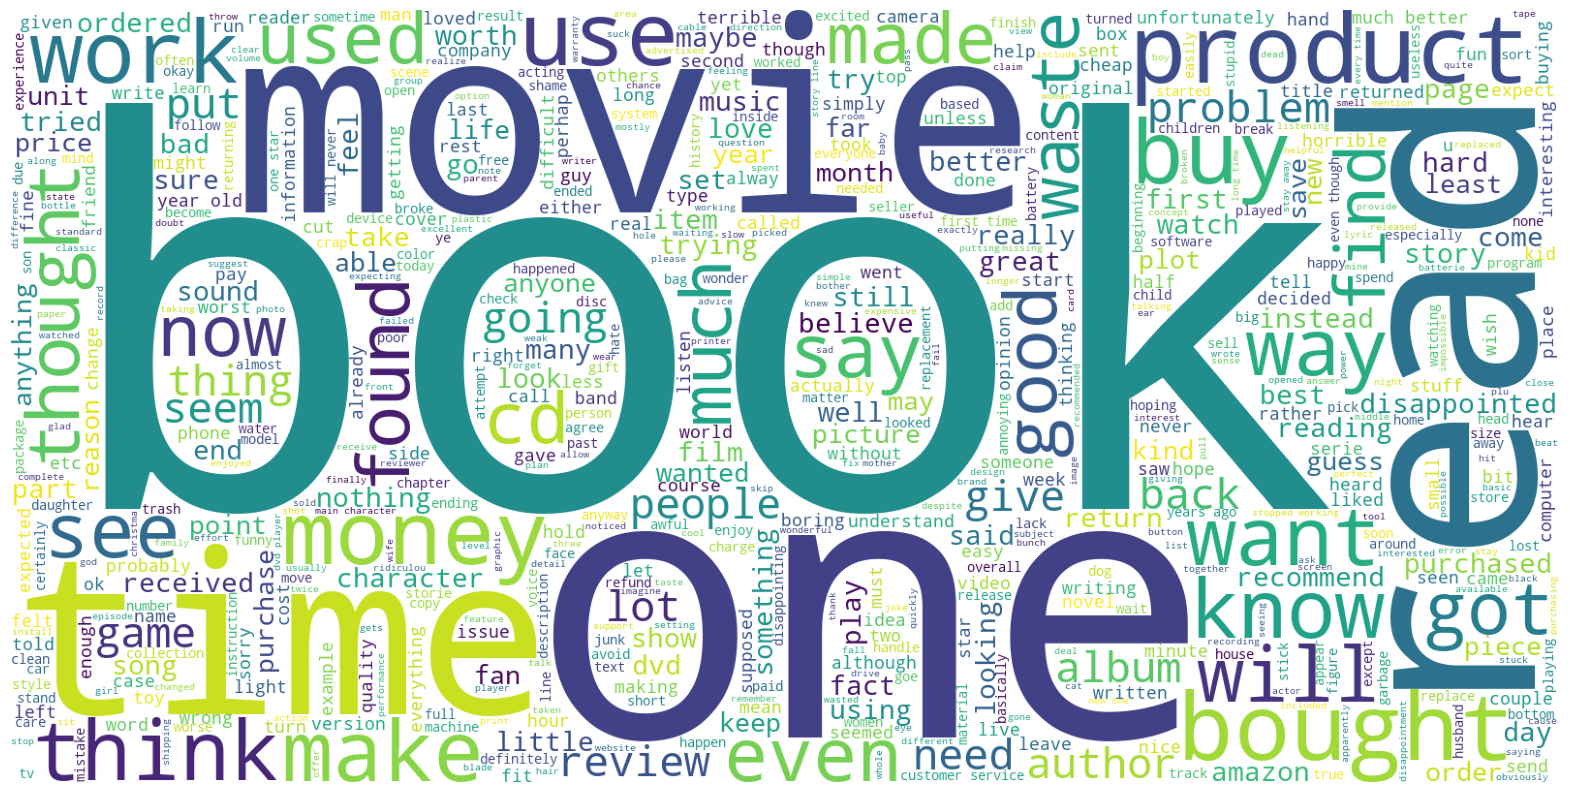

In [27]:
# Dataframe with polarity = 1
filtered_df = Dataset_1[Dataset_1['polarity'] == 1]

wordcloud_fun(filtered_df, "text")

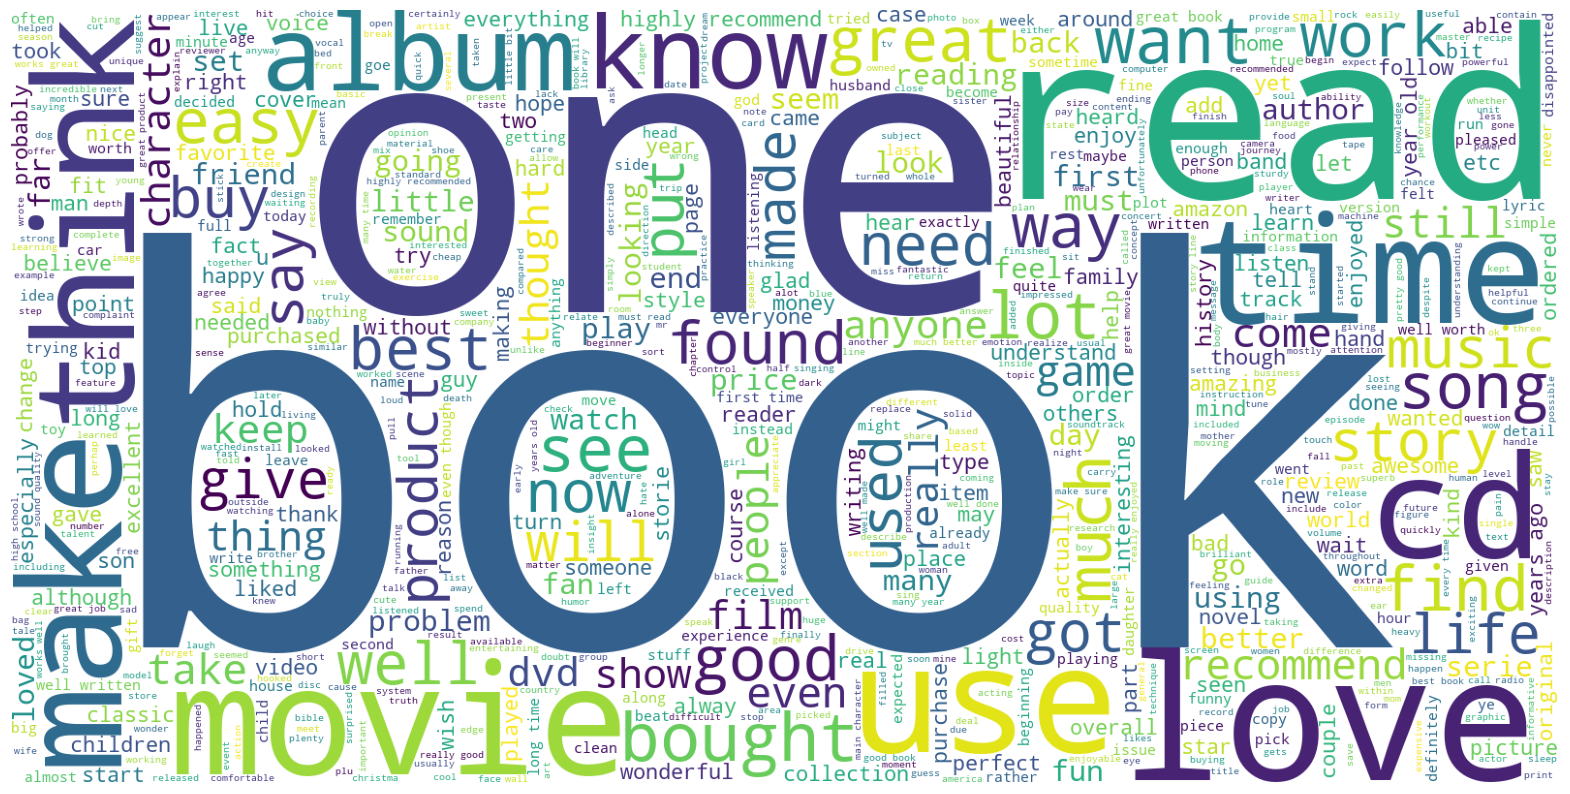

In [28]:
# Dataframe with polarity = 2
filtered_df = Dataset_1[Dataset_1['polarity'] == 2]

wordcloud_fun(filtered_df, "text")

#### WordClouds on Titles

We do the same operation as before, but in this case we use titles instead of entire reviews. Again, we first use WordClouds only to data with polarity equal to 1, and then only for data with polarity equal to 2.

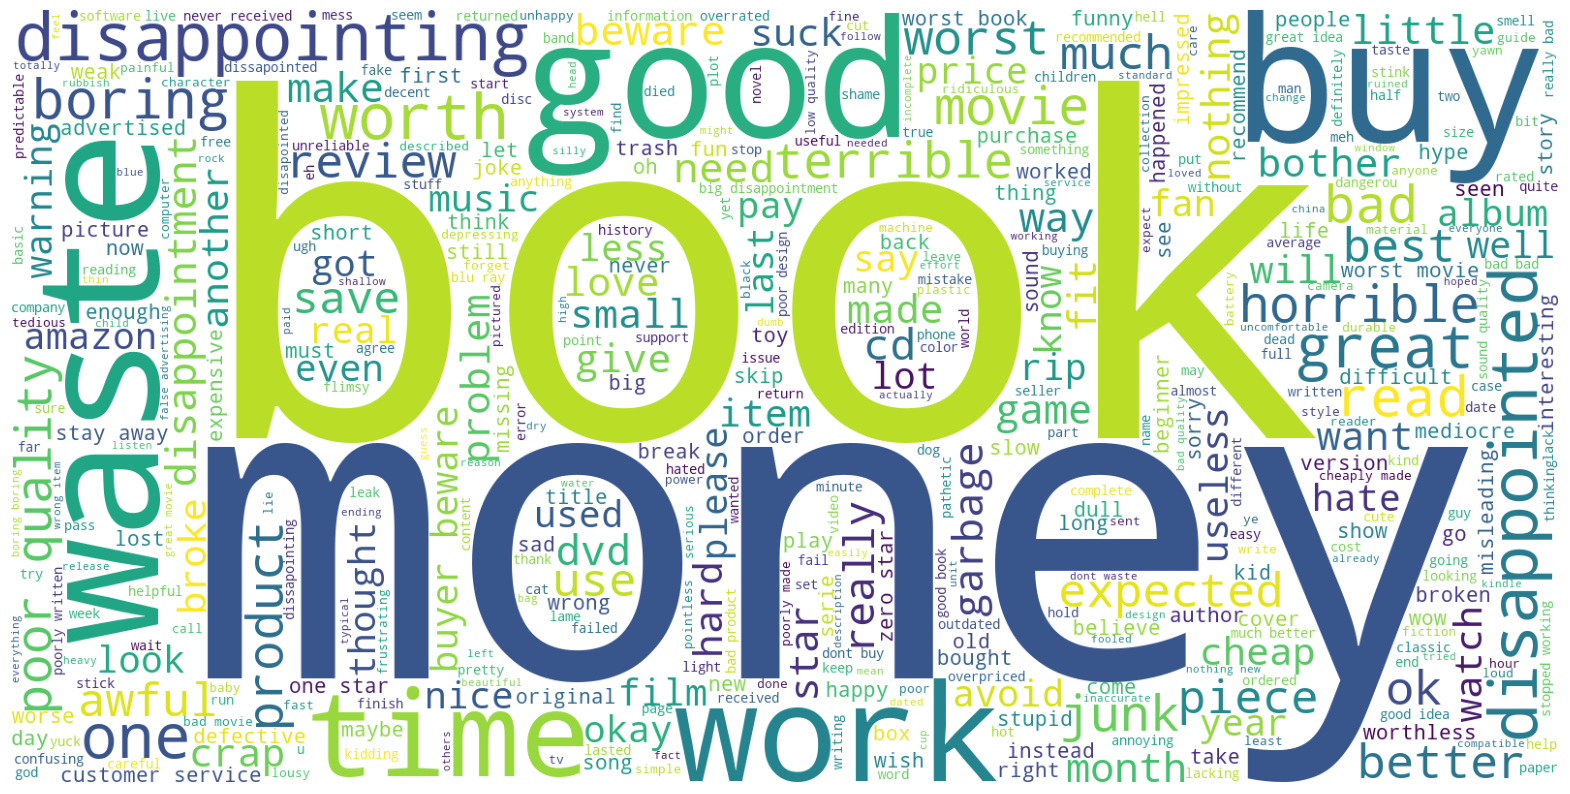

In [29]:
# Dataframe with polarity = 1
filtered_df = Dataset_1[Dataset_1['polarity'] == 1]

wordcloud_fun(filtered_df, "title")

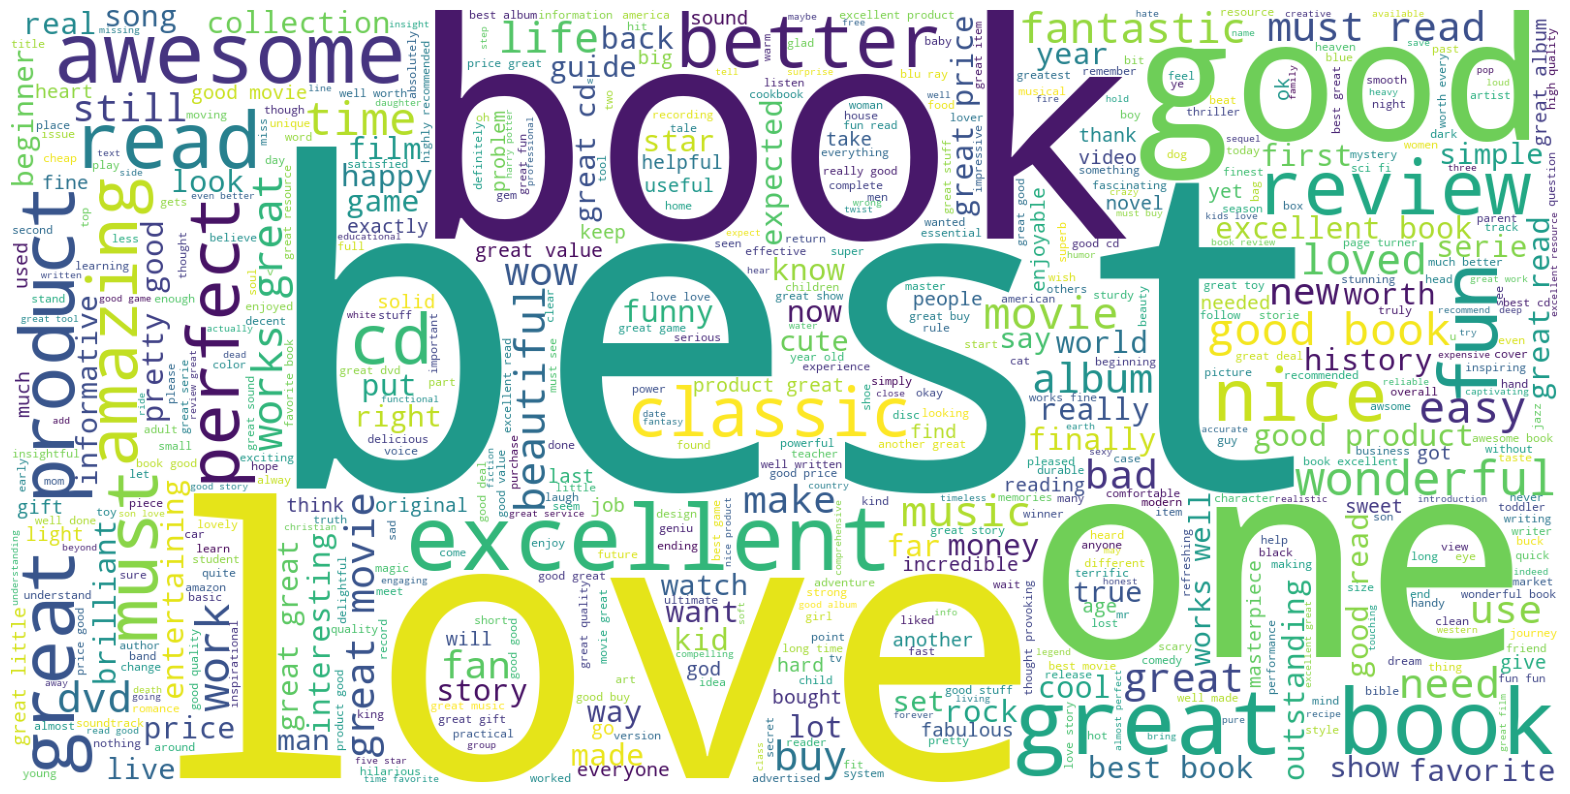

In [30]:
# Dataframe with polarity = 2
filtered_df = Dataset_1[Dataset_1['polarity'] == 2]

wordcloud_fun(filtered_df, "title")

#### Length of Text

In this section we want to analyze the length of titles and reviews in our dataset. 

We first create two new columns, *title_word_count* and *review_word_count*, in which we respectively store the number of words in each title and the number of words in each review.

In [31]:
Dataset_1['title_word_count'] = Dataset_1['title'].apply(lambda x: len(x.split(' ')))
Dataset_1['review_word_count'] = Dataset_1['text'].apply(lambda x: len(x.split(' ')))

We first visualize the distributions of these new two columns plotting histograms using the **sea_histogram** function defined in the Utility Function section. 

*Title_word_count*: here we can see, through the first figure, how titles that have 2 to 5 words represent the most significant cases, and how the number of occurrences of titles with more than 5 words drops exponentially as the length of the title increases. 

In the second figure we print the same distribution, but using a logarithmic scale on the y-axis. We can see how, using the logarithmic scale, the descent of the figure is linear, and therefore exponential in the actual distribution (the one without the logarithmic scale).

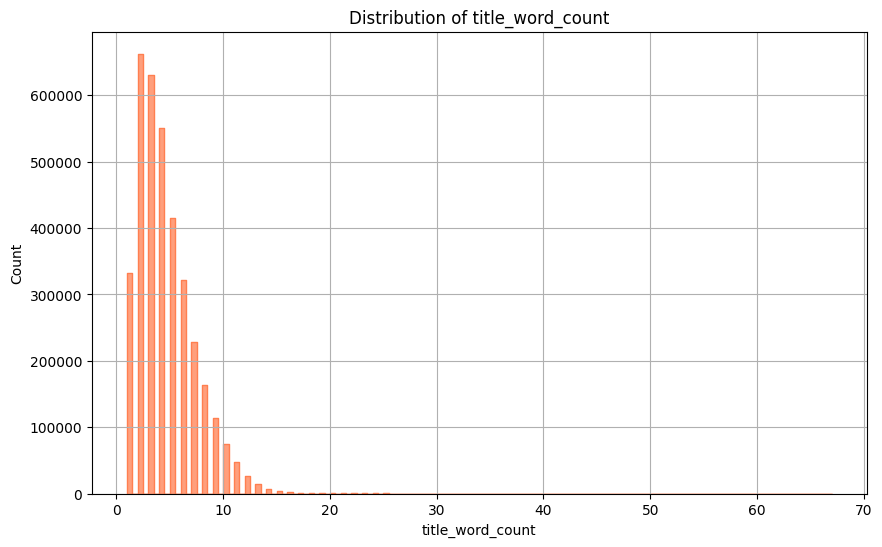

In [32]:
sea_histogram(dataframe_to_plot=Dataset_1, 
              column_of_interest="title_word_count", 
              title="Distribution of title_word_count",
              figsize=(10, 6),
              xlabel="title_word_count",
              ylabel="Count",
              binwidth=0.5,
              element="step",
              color="coral",
              show_grid=True)

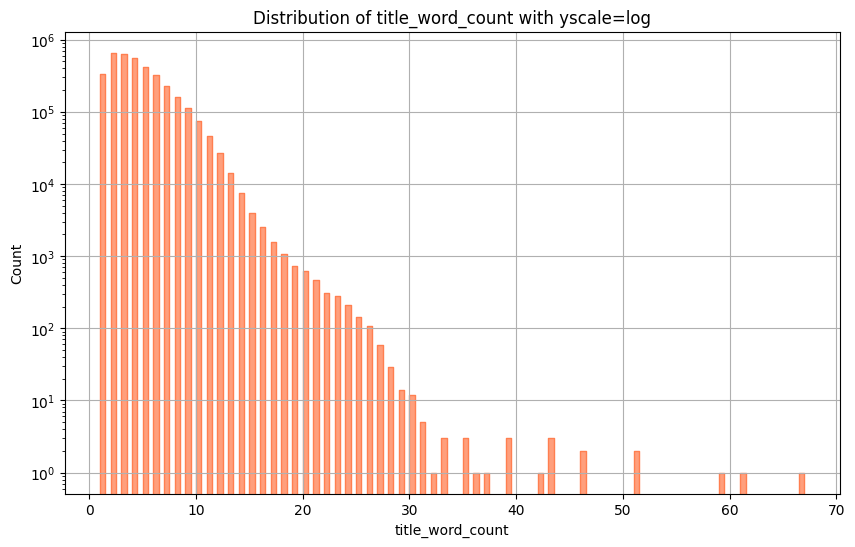

In [33]:
sea_histogram(dataframe_to_plot=Dataset_1, 
              column_of_interest="title_word_count", 
              title="Distribution of title_word_count with yscale=log",
              figsize=(10, 6),
              xlabel="title_word_count",
              ylabel="Count",
              binwidth=0.5,
              element="step",
              color="coral",
              ylog=True,
              show_grid=True)

*Review_word_count*: in the case of whole reviews, on the other hand, we see how the peak is for reviews about 20 words long. The descent of the curve shown in the figure is linear for reviews with more than 20 words: as the length of the reviews increases, the number of occurrences decreases linearly. For reviews shorter than 20 words in length, on the other hand, we have a super exponential decrease.

In the second figure we show the same graph, but studying its probability distribution, indicated both on the y-axis and by the curve visible in the figure.

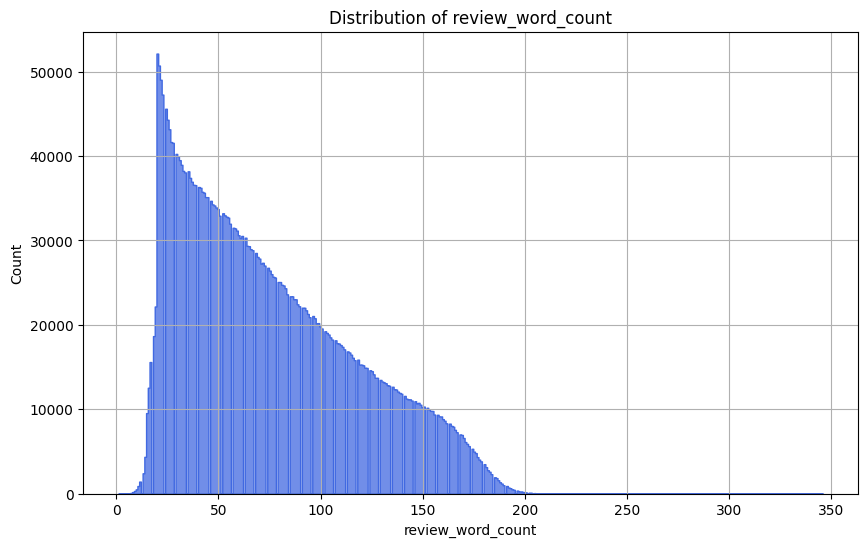

In [34]:
sea_histogram(dataframe_to_plot=Dataset_1, 
              column_of_interest="review_word_count", 
              title="Distribution of review_word_count",
              figsize=(10, 6),
              xlabel="review_word_count",
              ylabel="Count",
              color="royalblue",
              show_grid=True)

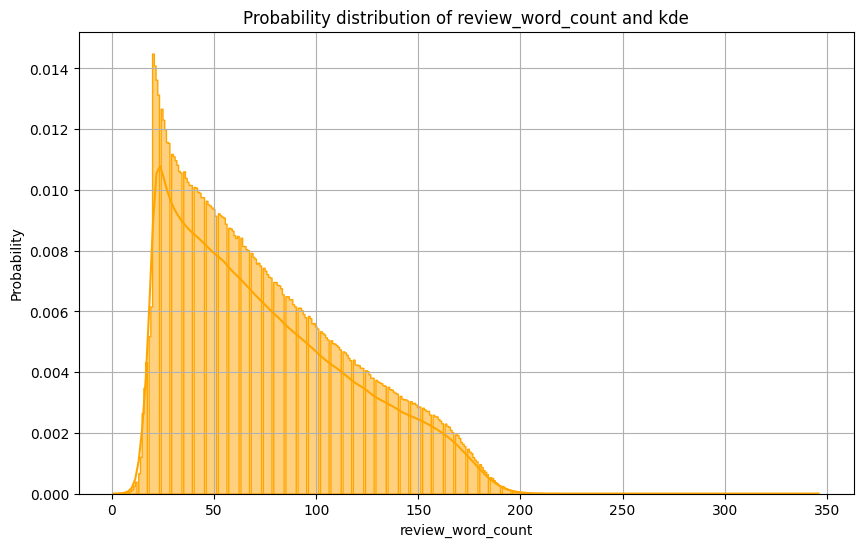

In [35]:
sea_histogram(dataframe_to_plot=Dataset_1, 
              column_of_interest="review_word_count", 
              title="Probability distribution of review_word_count and kde",
              figsize=(10, 6),
              xlabel="review_word_count",
              ylabel="Probability",
              stat="probability",
              kde=True,
              color="orange",
              show_grid=True)

At this we print box plots for both columns to show another side of the distribution. We print the box plots with both linear and logarithmic scaling on the y-axis. 

From the figures we can see how the linear descent on the length of whole reviews causes no outliers to be detected in the *review_word_count* column. In contrast, the exponential descent on the occurrences of long titles causes the box plots to detect several outliers.

We decide not to eliminate these outliers, however, and use them for our classification task.

In [36]:
columns_of_interest=["title_word_count", "review_word_count"]

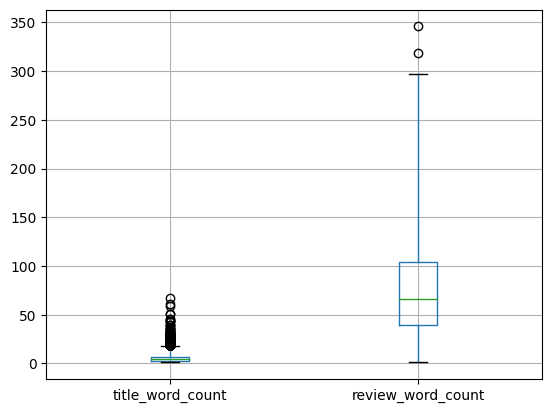

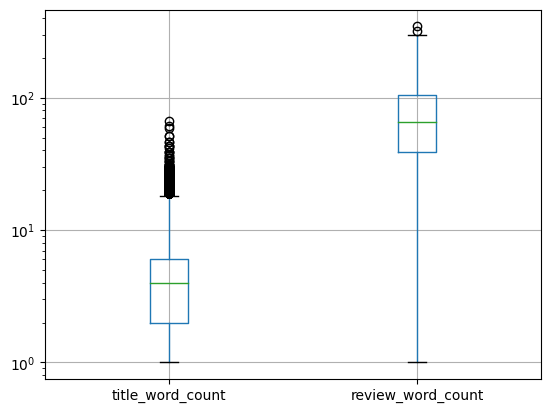

In [37]:
boxplot_func(columns_of_interest=columns_of_interest, 
             data_frame=Dataset_1, 
             whis=3)

boxplot_func(columns_of_interest=columns_of_interest, 
             data_frame=Dataset_1, 
             whis=3, 
             yscale="log")

At this point we ask, "*Is there a correlation between the length of reviews (or titles) and whether they are positive or not?*" For example, could it be the case that positive reviews, i.e., those associated with label 2 in the polarity column, are on average longer than negative reviews?

To answer this question we then printed histograms again, showing the distribution of the length of titles and reviews, i.e., the *title_word_count* and *review_word_count* columns, divided according to the labels in the *polarity* column. 

Looking at the graphs results the answer to our question was therefore: no. In fact, in this dataset the distribution of the length of titles and reviews is almost identical for both positive reviews (polarity=2) and negative reviews (polarity=1).

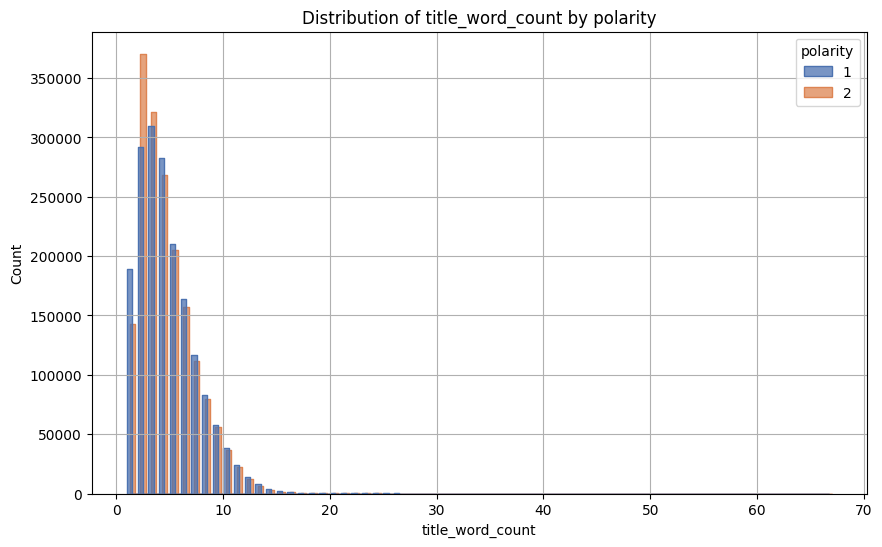

In [38]:
sea_histogram(dataframe_to_plot=Dataset_1, 
              column_of_interest="title_word_count", 
              title="Distribution of title_word_count by polarity",
              figsize=(10, 6),
              xlabel="title_word_count",
              ylabel="Count",
              hue="polarity",
              binwidth=0.5,
              multiple="dodge",
              element="step",
              #ylog=True,
              show_grid=True)

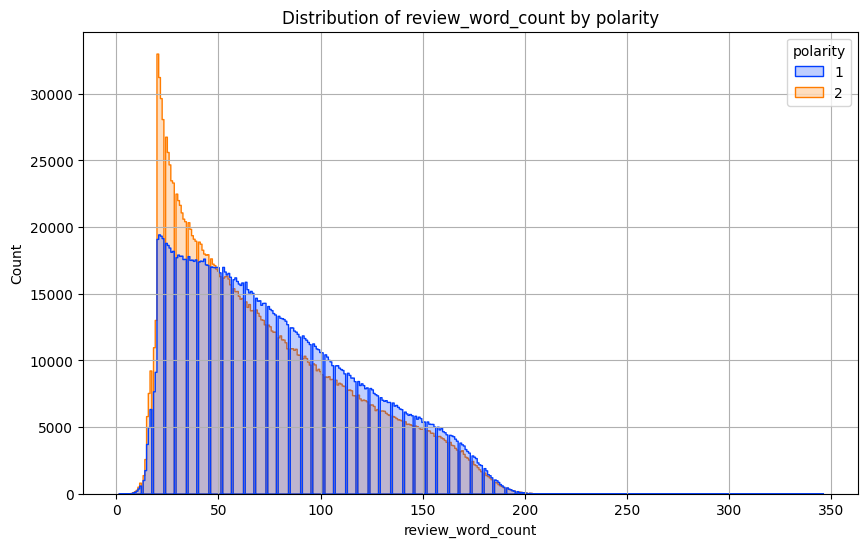

In [39]:
sea_histogram(dataframe_to_plot=Dataset_1, 
              column_of_interest="review_word_count", 
              title="Distribution of review_word_count by polarity",
              figsize=(10, 6),
              xlabel="review_word_count",
              ylabel="Count",
              hue="polarity",
              palette="bright",
              element="step",
              color="green",
              show_grid=True)

Finally, we remove the two columns defined at the beginning of the section, as we will not need them in future analyses.

In [40]:
Dataset_1=Dataset_1.drop(columns=["title_word_count", "review_word_count"])

### Second Dataset - Amazon Books Reviews

In [41]:
Dataset_2.shape

(2068120, 3)

Again, let us look at the distribution of values in the *review/score* column.

In [42]:
Dataset_2["review/score"].value_counts()

review/score
5.0    1233811
4.0     401379
3.0     177173
1.0     146689
2.0     109068
Name: count, dtype: int64

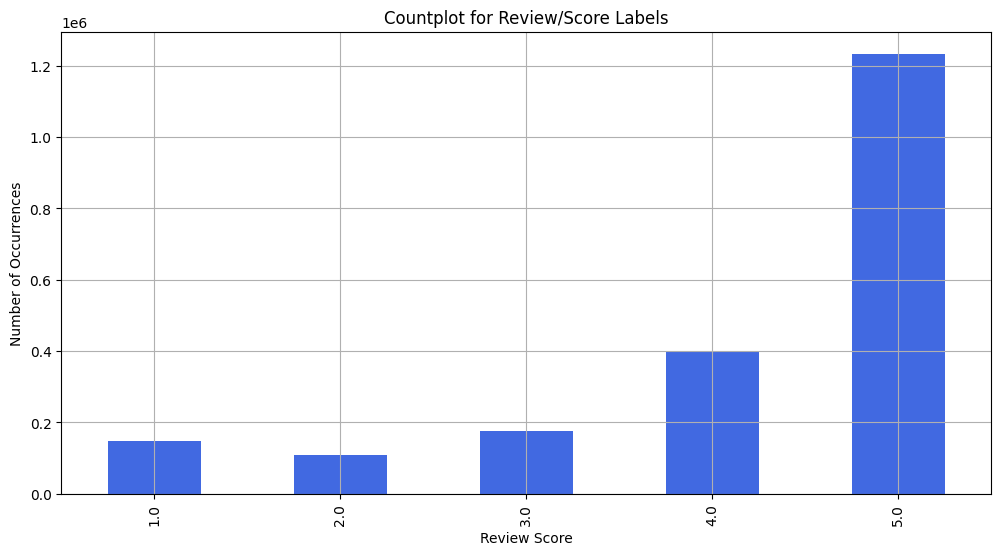

In [43]:
data_by_class = Dataset_2.groupby('review/score').size()

barchart_func(data_to_plot=data_by_class,
              ticksrange=range(len(data_by_class)),
              ticksname=data_by_class.index,
              title='Countplot for Review/Score Labels',
              xlabel="Review Score",
              ylabel="Number of Occurrences",
              color="royalblue",
              rotation=90,
              #yscale=None,
              show_grid=True
              )

At this point, however, we want to align the data in the *review/score* column with the data in the *polarity* column of the first dataset.

In [44]:
Dataset_2 = Dataset_2[Dataset_2['review/score'] != 3]

Now we create a new polarity column in the same way is constructed for the *Dataset_1*, so such that:
$$
\texttt{polarity} = \begin{cases}
 1 & \text{if} \texttt{ review/score= } 1 \text{ or } 2 \\
 2 & \text{if} \texttt{ review/score= } 4 \text{ or } 5 \\
\end{cases}
$$


In [45]:
# We define a function that returns the polarity value based on the review scoreone
def get_polarity(score):
    if score in [1, 2]:
        return 1
    elif score in [4, 5]:
        return 2

Dataset_2['polarity'] = Dataset_2['review/score'].apply(get_polarity)

Dataset_2.head()

review/score                                   review/summary  \
0           4.0           nice collection of julie strain images   
1           5.0                                really enjoyed it   
2           5.0  essential for every personal and public library   
3           4.0  phlip nel gives silly seuss a serious treatment   
4           4.0                           good academic overview   

                                         review/text  polarity  
0  this is only for julie strain fans. it's a col...         2  
1  i don't care much for dr. seuss but after read...         2  
2  if people become the books they read and if "t...         2  
3  theodore seuss geisel (1904 1991), aka quot;dr...         2  
4  philip nel   dr. seuss: american iconthis is b...         2

We now see that in this case the values in the *polarity* column are not balanced, as in the first dataset.

In [46]:
Dataset_2.polarity.value_counts()

polarity
2    1635190
1     255757
Name: count, dtype: int64

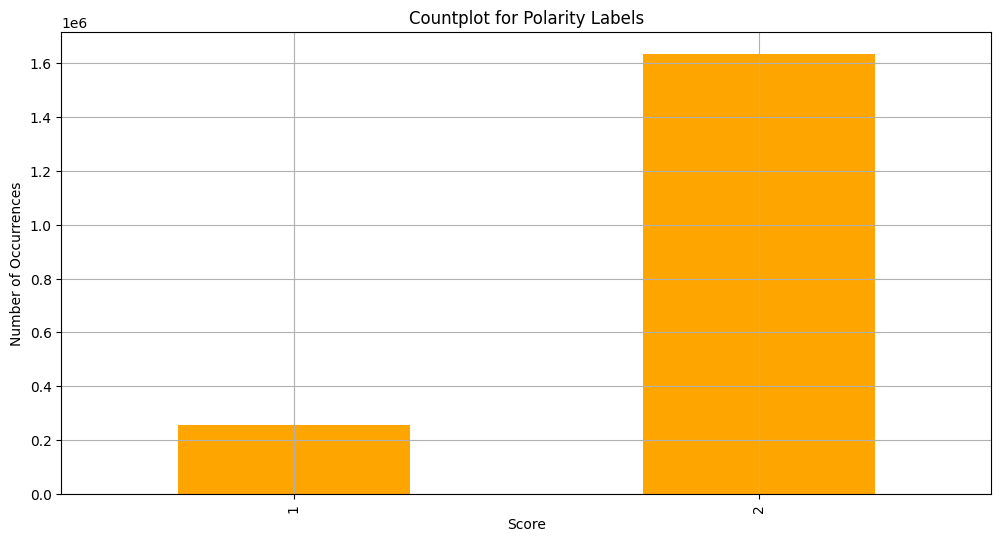

In [47]:
data_by_class = Dataset_2.groupby('polarity').size()

barchart_func(data_to_plot=data_by_class,
              ticksrange=range(len(data_by_class)),
              ticksname=data_by_class.index,
              title='Countplot for Polarity Labels',
              xlabel="Score",
              ylabel="Number of Occurrences",
              color="orange",
              rotation=90,
              show_grid=True
              )

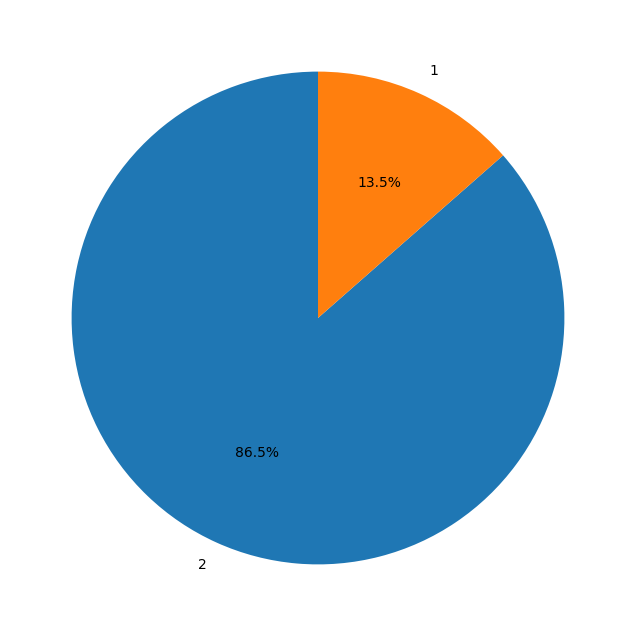

In [48]:
data_to_plot=Dataset_2.polarity.value_counts()

pieplot_func(data_to_plot.values, labels=data_to_plot.index)

Finally, we delete the *review/score* column as we no longer need it.

In [49]:
Dataset_2=Dataset_2.drop(columns="review/score")

#### WordClouds on Titles

We again use the WordClouds function to show the main words in the *review/summary* column of *Dataset_2*.

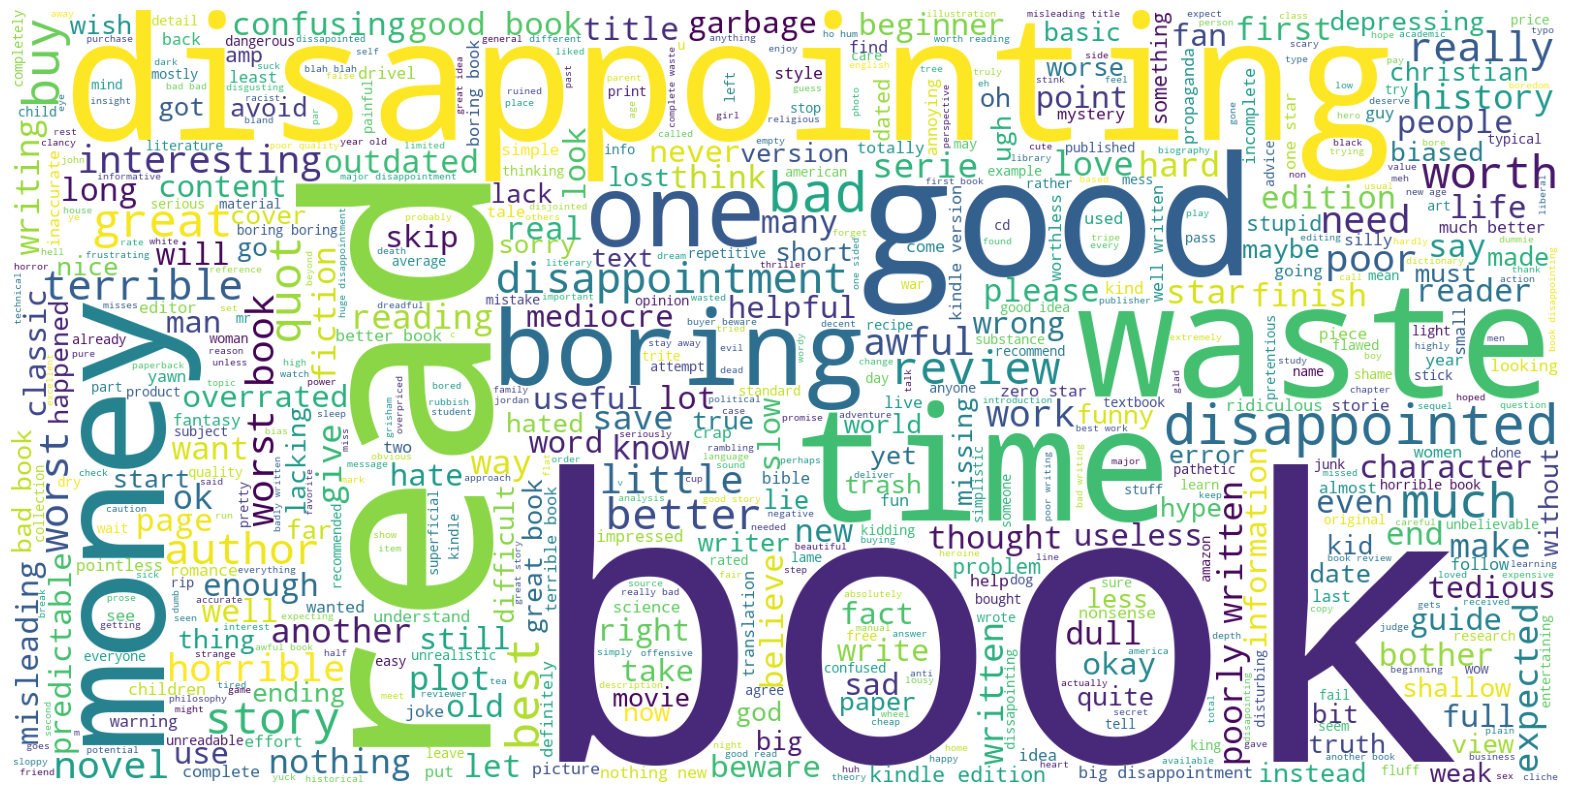

In [50]:
# Dataframe with polarity = 1
filtered_df = Dataset_2[Dataset_2['polarity'] == 1]

wordcloud_fun(filtered_df, "review/summary")

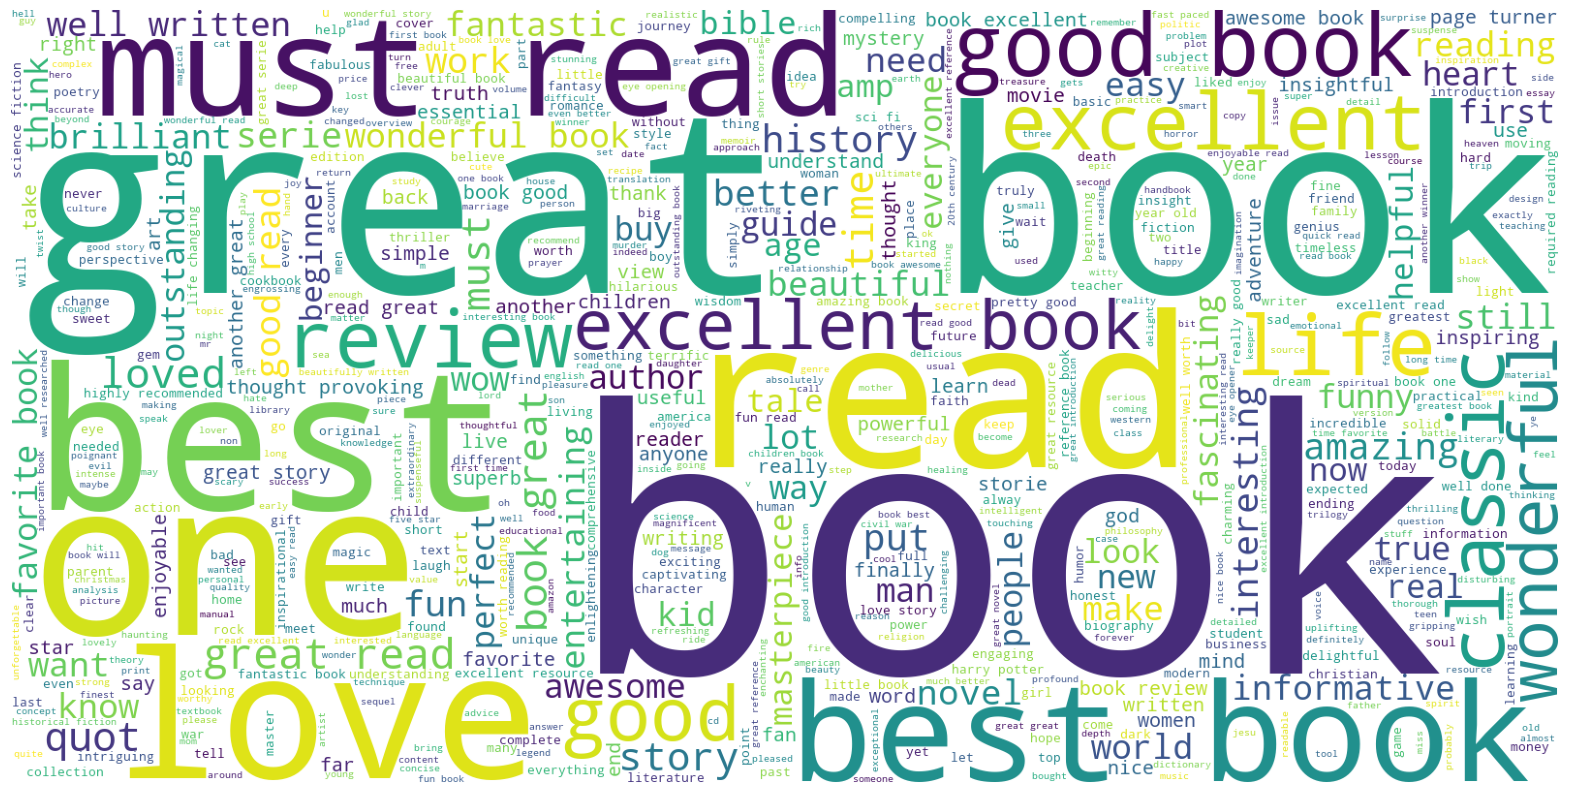

In [51]:
# Dataframe with polarity = 2
filtered_df = Dataset_2[Dataset_2['polarity'] == 2]

wordcloud_fun(filtered_df, "review/summary")

#### Lenght of Text

Also in this section, we do the same operations performed in analyzing the first dataset.

In [52]:
Dataset_2['title_word_count'] = Dataset_2['review/summary'].apply(lambda x: len(x.split(' ')))
Dataset_2['review_word_count'] = Dataset_2['review/text'].apply(lambda x: len(x.split(' ')))

Thus, we can see that
- the histogram that counts occurrences for each length of titles remains almost unchanged: we have an exponential decrease for titles longer than 5 words;
- the histogram for reviews, on the other hand, is very different and has a much more unstable distribution. We have an initial stepwise growth until we get to reviews about 20 words long. The number of reviews between 20 and 100 words long remains fairly unchanged, and the graph presents a more or less constant curve. For reviews with more than 100 words, however, we have a slightly exponential decrease. 

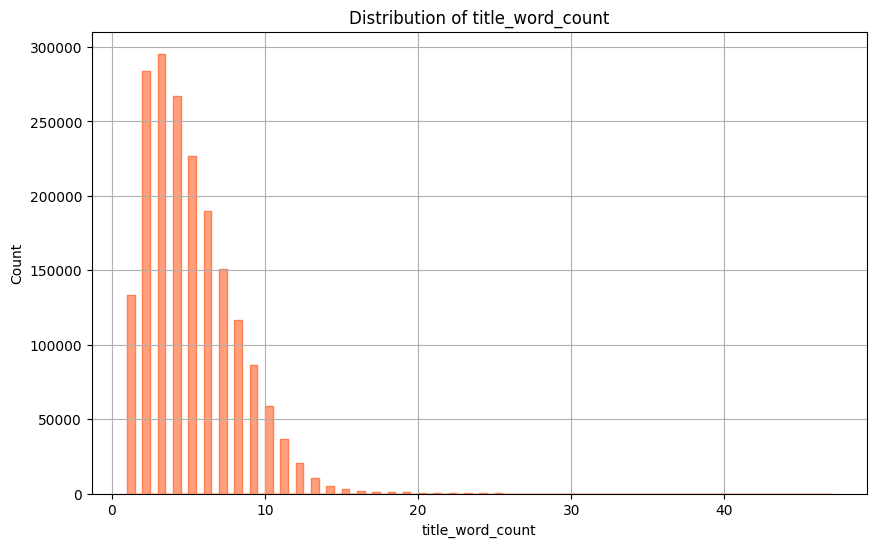

In [53]:
sea_histogram(dataframe_to_plot=Dataset_2, 
              column_of_interest="title_word_count", 
              title="Distribution of title_word_count",
              figsize=(10, 6),
              xlabel="title_word_count",
              ylabel="Count",
              binwidth=0.5,
              element="step",
              color="coral",
              show_grid=True)

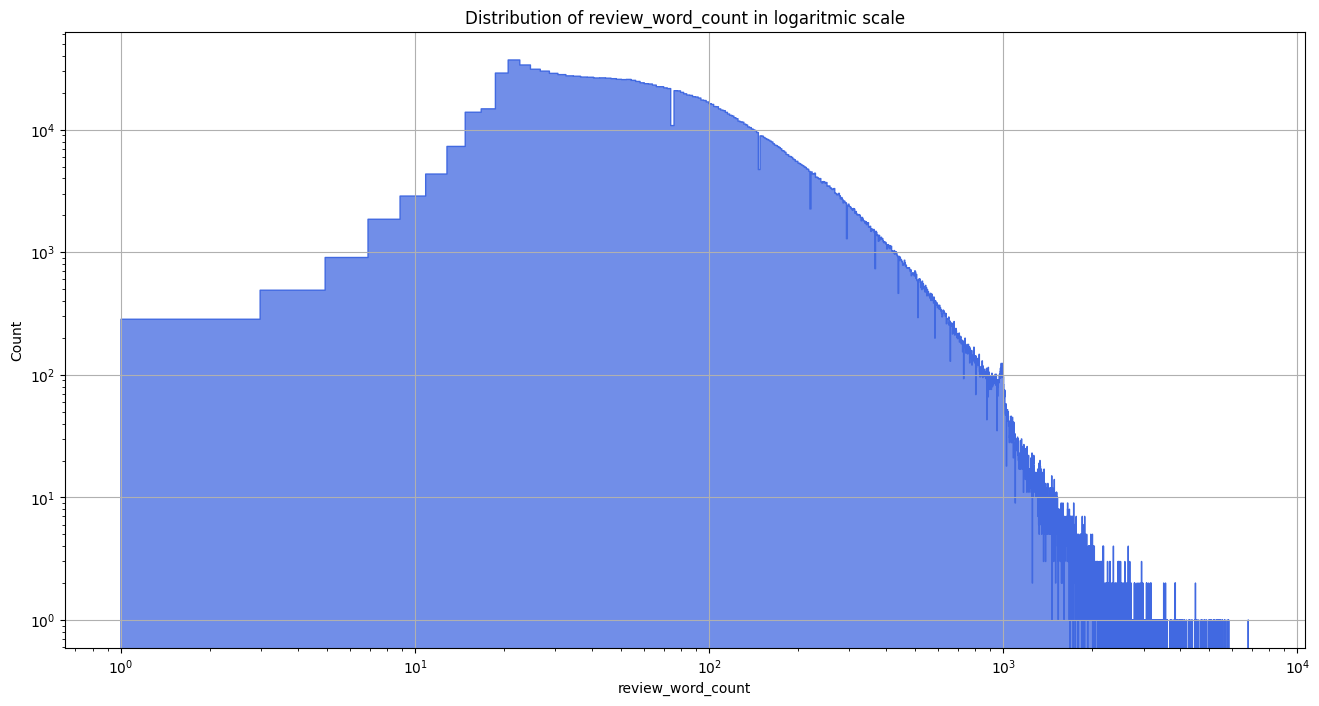

In [54]:
sea_histogram(dataframe_to_plot=Dataset_2, 
              column_of_interest="review_word_count", 
              title="Distribution of review_word_count in logaritmic scale",
              figsize=(16, 8),
              xlabel="review_word_count",
              ylabel="Count",
              color="royalblue",
              element="step",
              ylog=True,
              xlog=True,
              show_grid=True)

We print the box plots for these two columns again, using the **boxplot_func** function defined in the Utility Function section. 

We then see how in this case, not only does the box plot of title lengths have outliers, but also the box plot for reviews. This is a symptom of the much more articulated, and partly exponential, distribution we saw in the figure above.

In [55]:
columns_of_interest=["title_word_count", "review_word_count"]

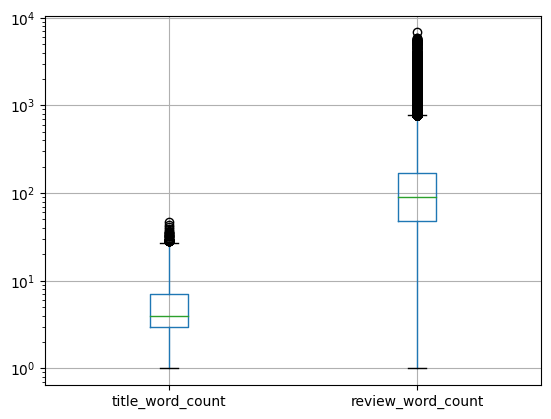

In [56]:
boxplot_func(columns_of_interest=columns_of_interest, 
             data_frame=Dataset_2, 
             whis=5, 
             yscale="log")

Let us analyze again the distribution of the lengths of titles and reviews according to the label presents in the *polarity* column. 

In doing so, we must take into account that, unlike in *Dataset_1*, where the *polarity* classes were balanced, in *Dataset_2* we have about 85% of the data belonging to the *polarity=2* class.

However, the substance does not change. In fact, although we have fewer data belonging to the *polarity=1* class, the distribution of lengths is the same for both classes, as is evident from the figures below.

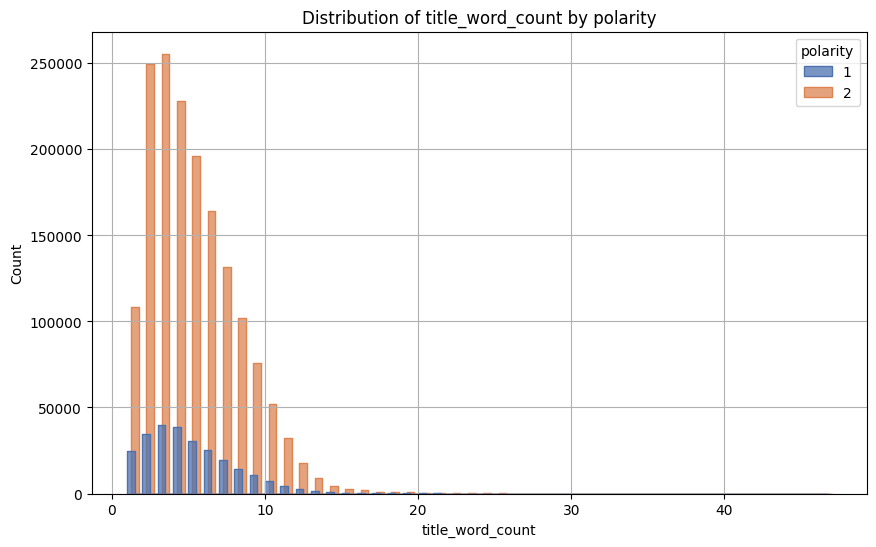

In [57]:
sea_histogram(dataframe_to_plot=Dataset_2, 
              column_of_interest="title_word_count", 
              title="Distribution of title_word_count by polarity",
              figsize=(10, 6),
              xlabel="title_word_count",
              ylabel="Count",
              hue="polarity",
              binwidth=0.5,
              multiple="dodge",
              element="step",
              show_grid=True)

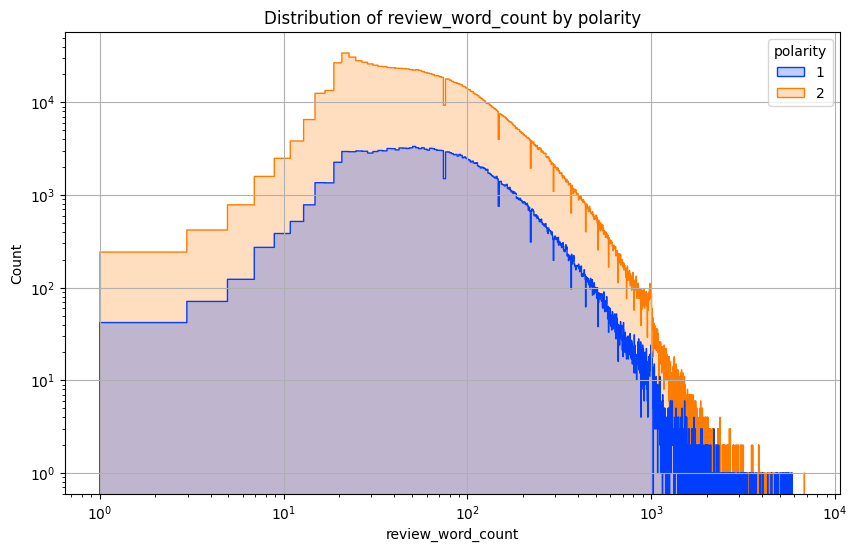

In [58]:
sea_histogram(dataframe_to_plot=Dataset_2, 
              column_of_interest="review_word_count", 
              title="Distribution of review_word_count by polarity",
              figsize=(10, 6),
              xlabel="review_word_count",
              ylabel="Count",
              hue="polarity",
              palette="bright",
              element="step",
              color="green",
              ylog=True,
              xlog=True,
              show_grid=True)

Finally, we eliminate the two columns used in this section for our analysis.

In [59]:
Dataset_2=Dataset_2.drop(columns=["title_word_count", "review_word_count"])